# Genetik Algoritma ile Tarım Arazisinde Gübre ve Sulama Optimizasyonu

**Öğrenci Bilgileri:**
- **Ad Soyad:** Ahmet Hakan AYDIN
- **Öğrenci No:** 2012721044
- **GİTHUB Repo:** https://github.com/AhmetHakanAydn/genetik_optimizasyonu


## 1. Problem Tanımı

Bu projede, Genetik Algoritma (GA) kullanarak tarım arazisinde gübre ve sulama miktarlarını optimize ediyoruz.

### Amaç Fonksiyonu (Maksimizasyon):
$$y = 10x_1 + 6x_2 - 0.5x_1^2 - 0.2x_2^2$$

### Değişkenler ve Sınırlar:
- $x_1$: Gübre miktarı (kg/da) $\rightarrow [0, 50]$ (tam sayı)
- $x_2$: Sulama miktarı (L/da) $\rightarrow [0, 100]$ (tam sayı)

### Kısıtlar (Constraints):
- $x_1 + 0.1x_2 \leq 60$
- $x_2 \geq 20$


## 2. Gerekli Kütüphanelerin İçe Aktarılması


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Görselleştirme ayarları
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Kütüphaneler başarıyla yüklendi!")


Kütüphaneler başarıyla yüklendi!


## 3. Genetik Algoritma Hiperparametreleri

Genetik Algoritma'nın çalışması için gerekli parametreler aşağıda tanımlanmıştır:


In [2]:
# Hiperparametreler
N = 100          # Popülasyon Büyüklüğü
Gen = 100        # Maksimum İterasyon Sayısı (Nesil)
P_c = 0.8        # Çaprazlama Oranı (Crossover Rate)
P_m = 0.05       # Mutasyon Oranı (Mutation Rate)
D = 2            # Değişken Sayısı (x1 ve x2)

# Değişken sınırları
bounds = {
    'x1': [0, 50],    # Gübre miktarı sınırları
    'x2': [0, 100]    # Sulama miktarı sınırları
}

# Kısıt parametreleri
M = 1000         # Penalty (ceza) katsayısı (kısıt ihlalleri için)

print(f"Popülasyon Büyüklüğü (N): {N}")
print(f"Maksimum Nesil Sayısı (Gen): {Gen}")
print(f"Çaprazlama Oranı (P_c): {P_c}")
print(f"Mutasyon Oranı (P_m): {P_m}")
print(f"Değişken Sayısı (D): {D}")


Popülasyon Büyüklüğü (N): 100
Maksimum Nesil Sayısı (Gen): 100
Çaprazlama Oranı (P_c): 0.8
Mutasyon Oranı (P_m): 0.05
Değişken Sayısı (D): 2


## 4. Amaç Fonksiyonu

Amaç fonksiyonu, verilen gübre ($x_1$) ve sulama ($x_2$) miktarlarına göre verimi hesaplar.


In [3]:
def objective_function(x1, x2):
    """
    Amaç fonksiyonu: y = 10x1 + 6x2 - 0.5x1^2 - 0.2x2^2

    Parametreler:
    - x1: Gübre miktarı (kg/da)
    - x2: Sulama miktarı (L/da)

    Döndürür:
    - y: Verim değeri (maksimize edilecek)
    """
    y = 10 * x1 + 6 * x2 - 0.5 * (x1 ** 2) - 0.2 * (x2 ** 2)
    return y

# Test
test_x1, test_x2 = 25, 50
test_y = objective_function(test_x1, test_x2)
print(f"Test: x1={test_x1}, x2={test_x2} -> y={test_y:.2f}")


Test: x1=25, x2=50 -> y=-262.50


## 5. Uygunluk Fonksiyonu (Penalty Metodu ile Kısıt Kontrolü)

Uygunluk fonksiyonu, amaç fonksiyonunu kullanır ancak kısıt ihlallerini cezalandırır. Bu sayede GA, kısıtları sağlayan çözümlere yönelir.

**Kısıtlar:**
- $C_1 = \max(0, x_1 + 0.1x_2 - 60)$ (İhlal edildiğinde pozitif değer alır)
- $C_2 = \max(0, 20 - x_2)$ (İhlal edildiğinde pozitif değer alır)

**Penalty:** $M \cdot (C_1 + C_2)$


In [4]:
def fitness_function(x1, x2, M=1000):
    """
    Uygunluk fonksiyonu: Amaç fonksiyonundan kısıt ihlallerinin cezasını çıkarır.

    Parametreler:
    - x1: Gübre miktarı (kg/da)
    - x2: Sulama miktarı (L/da)
    - M: Penalty (ceza) katsayısı

    Döndürür:
    - fitness: Uygunluk değeri (yüksek = daha iyi)
    """
    # Amaç fonksiyonu değeri
    objective_value = objective_function(x1, x2)

    # Kısıt ihlallerini hesapla
    # Kısıt 1: x1 + 0.1*x2 <= 60
    constraint1_violation = max(0, x1 + 0.1 * x2 - 60)

    # Kısıt 2: x2 >= 20
    constraint2_violation = max(0, 20 - x2)

    # Toplam ihlal
    total_violation = constraint1_violation + constraint2_violation

    # Penalty uygula
    penalty = M * total_violation

    # Uygunluk = Amaç fonksiyonu - Penalty
    fitness = objective_value - penalty

    return fitness

# Test: Kısıtları sağlayan bir çözüm
test_x1, test_x2 = 30, 50
test_fitness = fitness_function(test_x1, test_x2)
print(f"Test (Kısıtlar sağlanıyor): x1={test_x1}, x2={test_x2}")
print(f"Uygunluk: {test_fitness:.2f}")

# Test: Kısıtları ihlal eden bir çözüm
test_x1_bad, test_x2_bad = 70, 10
test_fitness_bad = fitness_function(test_x1_bad, test_x2_bad)
print(f"\nTest (Kısıtlar ihlal ediliyor): x1={test_x1_bad}, x2={test_x2_bad}")
print(f"Uygunluk: {test_fitness_bad:.2f}")


Test (Kısıtlar sağlanıyor): x1=30, x2=50
Uygunluk: -350.00

Test (Kısıtlar ihlal ediliyor): x1=70, x2=10
Uygunluk: -22710.00


## 6. İlk Popülasyon Oluşturma

Her birey (kromozom), iki gen içerir: $x_1$ ve $x_2$. Her gen, kendi sınırları içinde rastgele bir tam sayı değeri alır.


In [5]:
def initialize_population(pop_size, bounds):
    """
    İlk popülasyonu oluşturur.

    Parametreler:
    - pop_size: Popülasyon büyüklüğü
    - bounds: Değişken sınırları sözlüğü {'x1': [min, max], 'x2': [min, max]}

    Döndürür:
    - population: Her satırı bir birey (kromozom) olan 2D array [pop_size x 2]
    """
    population = np.zeros((pop_size, 2), dtype=int)

    for i in range(pop_size):
        # x1 için rastgele tam sayı [0, 50]
        population[i, 0] = np.random.randint(bounds['x1'][0], bounds['x1'][1] + 1)
        # x2 için rastgele tam sayı [0, 100]
        population[i, 1] = np.random.randint(bounds['x2'][0], bounds['x2'][1] + 1)

    return population

# Test
test_pop = initialize_population(5, bounds)
print("Örnek popülasyon (ilk 5 birey):")
print(test_pop)
print(f"\nPopülasyon şekli: {test_pop.shape}")


Örnek popülasyon (ilk 5 birey):
[[ 7 18]
 [30 68]
 [18 68]
 [36 95]
 [30 35]]

Popülasyon şekli: (5, 2)


## 7. Seçim Mekanizması: Turnuva Seçimi (Tournament Selection)

**Turnuva Seçimi:** Rastgele seçilen birkaç birey arasından en yüksek uygunluğa sahip olanı seçer. Bu yöntem, çeşitliliği korurken iyi bireyleri tercih eder.

**Adımlar:**
1. Popülasyondan rastgele $k$ birey seçilir (turnuva boyutu, genellikle $k=2$ veya $k=3$)
2. Bu bireyler arasından en yüksek uygunluğa sahip olan seçilir
3. Bu işlem yeni popülasyon büyüklüğü kadar tekrarlanır


In [6]:
def selection(population, fitness_values, tournament_size=3):
    """
    Turnuva seçimi ile ebeveyn seçimi yapar.

    Parametreler:
    - population: Mevcut popülasyon [pop_size x 2]
    - fitness_values: Her bireyin uygunluk değerleri [pop_size]
    - tournament_size: Turnuva boyutu (varsayılan: 3)

    Döndürür:
    - selected_population: Seçilen bireyler [pop_size x 2]
    """
    pop_size = len(population)
    selected_population = np.zeros_like(population)

    for i in range(pop_size):
        # Turnuva için rastgele bireyler seç
        tournament_indices = np.random.choice(pop_size, size=tournament_size, replace=False)
        tournament_fitness = fitness_values[tournament_indices]

        # En iyi uygunluğa sahip bireyin indeksini bul
        winner_idx = tournament_indices[np.argmax(tournament_fitness)]

        # Kazananı seçilen popülasyona ekle
        selected_population[i] = population[winner_idx].copy()

    return selected_population

# Test
test_pop = initialize_population(10, bounds)
test_fitness = np.array([fitness_function(ind[0], ind[1]) for ind in test_pop])
selected = selection(test_pop, test_fitness, tournament_size=3)
print("Seçim işlemi tamamlandı!")
print(f"Orijinal popülasyon şekli: {test_pop.shape}")
print(f"Seçilen popülasyon şekli: {selected.shape}")


Seçim işlemi tamamlandı!
Orijinal popülasyon şekli: (10, 2)
Seçilen popülasyon şekli: (10, 2)


## 8. Çaprazlama: Tek Noktalı Çaprazlama (Single-Point Crossover)

**Tek Noktalı Çaprazlama:** İki ebeveyn kromozomunu rastgele bir noktadan keser ve parçaları değiş tokuş eder.

**Örnek:**
- Ebeveyn 1: [x1₁, x2₁]
- Ebeveyn 2: [x1₂, x2₂]
- Kesim noktası: 1 (ikinci genden önce)
- Yavru 1: [x1₁, x2₂]
- Yavru 2: [x1₂, x2₁]

**Çaprazlama Oranı ($P_c$):** Her çift için çaprazlama yapılma olasılığı.


In [7]:
def crossover(parent1, parent2, P_c, bounds):
    """
    Tek noktalı çaprazlama işlemi yapar.

    Parametreler:
    - parent1: İlk ebeveyn [x1, x2]
    - parent2: İkinci ebeveyn [x1, x2]
    - P_c: Çaprazlama olasılığı
    - bounds: Değişken sınırları

    Döndürür:
    - offspring1, offspring2: İki yavru birey
    """
    # Çaprazlama yapılıp yapılmayacağını belirle
    if np.random.random() < P_c:
        # Çaprazlama noktası seç (1 veya 2 gen arasında, yani 0 veya 1)
        crossover_point = np.random.randint(1, len(parent1))

        # Yavruları oluştur
        offspring1 = np.concatenate([parent1[:crossover_point], parent2[crossover_point:]])
        offspring2 = np.concatenate([parent2[:crossover_point], parent1[crossover_point:]])

        # Sınırları kontrol et ve düzelt
        offspring1[0] = np.clip(offspring1[0], bounds['x1'][0], bounds['x1'][1])
        offspring1[1] = np.clip(offspring1[1], bounds['x2'][0], bounds['x2'][1])
        offspring2[0] = np.clip(offspring2[0], bounds['x1'][0], bounds['x1'][1])
        offspring2[1] = np.clip(offspring2[1], bounds['x2'][0], bounds['x2'][1])

        # Tam sayıya çevir
        offspring1 = offspring1.astype(int)
        offspring2 = offspring2.astype(int)
    else:
        # Çaprazlama yapılmazsa, ebeveynler aynen kopyalanır
        offspring1 = parent1.copy()
        offspring2 = parent2.copy()

    return offspring1, offspring2

# Test
p1 = np.array([25, 50])
p2 = np.array([30, 70])
o1, o2 = crossover(p1, p2, 0.8, bounds)
print(f"Ebeveyn 1: {p1}")
print(f"Ebeveyn 2: {p2}")
print(f"Yavru 1: {o1}")
print(f"Yavru 2: {o2}")


Ebeveyn 1: [25 50]
Ebeveyn 2: [30 70]
Yavru 1: [25 70]
Yavru 2: [30 50]


## 9. Mutasyon: Rastgele Üniform Mutasyon

**Rastgele Üniform Mutasyon:** Her gen için, mutasyon olasılığı ($P_m$) kadar, o genin değeri kendi sınırları içinde rastgele bir değerle değiştirilir.

**Mutasyon Oranı ($P_m$):** Her gen için mutasyon yapılma olasılığı (genellikle düşük, örn. 0.05).


In [8]:
def mutation(individual, P_m, bounds):
    """
    Rastgele üniform mutasyon uygular.

    Parametreler:
    - individual: Mutasyona uğrayacak birey [x1, x2]
    - P_m: Mutasyon olasılığı
    - bounds: Değişken sınırları

    Döndürür:
    - mutated_individual: Mutasyona uğramış birey
    """
    mutated = individual.copy()

    # Her gen için mutasyon kontrolü
    for i in range(len(mutated)):
        if np.random.random() < P_m:
            # i=0 ise x1, i=1 ise x2
            if i == 0:
                # x1 için sınırlar içinde rastgele değer
                mutated[i] = np.random.randint(bounds['x1'][0], bounds['x1'][1] + 1)
            else:
                # x2 için sınırlar içinde rastgele değer
                mutated[i] = np.random.randint(bounds['x2'][0], bounds['x2'][1] + 1)

    return mutated

# Test
test_ind = np.array([25, 50])
mutated = mutation(test_ind, 0.05, bounds)
print(f"Orijinal birey: {test_ind}")
print(f"Mutasyona uğramış birey: {mutated}")
print(f"Sınırlar içinde mi? x1: {bounds['x1'][0]} <= {mutated[0]} <= {bounds['x1'][1]}, "
      f"x2: {bounds['x2'][0]} <= {mutated[1]} <= {bounds['x2'][1]}")


Orijinal birey: [25 50]
Mutasyona uğramış birey: [ 3 50]
Sınırlar içinde mi? x1: 0 <= 3 <= 50, x2: 0 <= 50 <= 100


## 10. Ana Genetik Algoritma Döngüsü

GA döngüsü şu adımları içerir:
1. İlk popülasyonu oluştur
2. Her nesil için:
   - Uygunluk değerlerini hesapla
   - En iyi bireyi kaydet (elitizm için)
   - Seçim yap
   - Çaprazlama uygula
   - Mutasyon uygula
   - En iyi bireyi yeni nesle ekle (elitizm)
3. Sonuçları döndür


In [9]:
def main_ga(N, Gen, P_c, P_m, bounds, M=1000):
    """
    Ana Genetik Algoritma döngüsü.

    Parametreler:
    - N: Popülasyon büyüklüğü
    - Gen: Maksimum nesil sayısı
    - P_c: Çaprazlama olasılığı
    - P_m: Mutasyon olasılığı
    - bounds: Değişken sınırları
    - M: Penalty katsayısı

    Döndürür:
    - best_individual: En iyi birey [x1, x2]
    - best_fitness_history: Her nesildeki en iyi uygunluk değerleri
    - best_individual_history: Her nesildeki en iyi birey
    """
    # İlk popülasyonu oluştur
    population = initialize_population(N, bounds)

    # En iyi değerleri takip etmek için
    best_fitness_history = []
    best_individual_history = []

    # Ana döngü
    for generation in range(Gen):
        # Uygunluk değerlerini hesapla
        fitness_values = np.array([fitness_function(ind[0], ind[1], M) for ind in population])

        # En iyi bireyi bul
        best_idx = np.argmax(fitness_values)
        best_individual = population[best_idx].copy()
        best_fitness = fitness_values[best_idx]

        # Geçmişi kaydet
        best_fitness_history.append(best_fitness)
        best_individual_history.append(best_individual.copy())

        # Yeni nesil için boş popülasyon
        new_population = np.zeros_like(population)

        # Seçim
        selected_population = selection(population, fitness_values, tournament_size=3)

        # Çaprazlama ve mutasyon
        for i in range(0, N, 2):
            # İki ebeveyn seç
            parent1 = selected_population[i]
            parent2 = selected_population[(i + 1) % N]  # Son birey için ilk bireyi al

            # Çaprazlama
            offspring1, offspring2 = crossover(parent1, parent2, P_c, bounds)

            # Mutasyon
            offspring1 = mutation(offspring1, P_m, bounds)
            offspring2 = mutation(offspring2, P_m, bounds)

            # Yeni popülasyona ekle
            new_population[i] = offspring1
            if i + 1 < N:
                new_population[i + 1] = offspring2

        # Elitizm: En iyi bireyi yeni nesle ekle (rastgele bir bireyin yerine)
        worst_idx = np.argmin([fitness_function(ind[0], ind[1], M) for ind in new_population])
        new_population[worst_idx] = best_individual

        # Popülasyonu güncelle
        population = new_population

        # İlerleme bilgisi (her 10 nesilde bir)
        if (generation + 1) % 10 == 0:
            print(f"Nesil {generation + 1}/{Gen}: En iyi uygunluk = {best_fitness:.2f}, "
                  f"x1 = {int(best_individual[0])}, x2 = {int(best_individual[1])}")

    # Final en iyi bireyi bul
    final_fitness = np.array([fitness_function(ind[0], ind[1], M) for ind in population])
    final_best_idx = np.argmax(final_fitness)
    final_best_individual = population[final_best_idx]

    return final_best_individual, best_fitness_history, best_individual_history

print("Ana GA fonksiyonu tanımlandı!")


Ana GA fonksiyonu tanımlandı!


## 11. Genetik Algoritmayı Çalıştırma

GA'yı çalıştırıp sonuçları elde ediyoruz.


In [10]:
# Genetik Algoritmayı çalıştır
print("Genetik Algoritma başlatılıyor...\n")
best_solution, fitness_history, individual_history = main_ga(N, Gen, P_c, P_m, bounds, M)

print("\n" + "="*60)
print("OPTİMİZASYON TAMAMLANDI!")
print("="*60)


Genetik Algoritma başlatılıyor...

Nesil 10/100: En iyi uygunluk = 89.50, x1 = 11, x2 = 20
Nesil 20/100: En iyi uygunluk = 90.00, x1 = 10, x2 = 20
Nesil 30/100: En iyi uygunluk = 90.00, x1 = 10, x2 = 20
Nesil 40/100: En iyi uygunluk = 90.00, x1 = 10, x2 = 20
Nesil 50/100: En iyi uygunluk = 90.00, x1 = 10, x2 = 20
Nesil 60/100: En iyi uygunluk = 90.00, x1 = 10, x2 = 20
Nesil 70/100: En iyi uygunluk = 90.00, x1 = 10, x2 = 20
Nesil 80/100: En iyi uygunluk = 90.00, x1 = 10, x2 = 20
Nesil 90/100: En iyi uygunluk = 90.00, x1 = 10, x2 = 20
Nesil 100/100: En iyi uygunluk = 90.00, x1 = 10, x2 = 20

OPTİMİZASYON TAMAMLANDI!


## 12. Sonuçların Görselleştirilmesi

En iyi uygunluk değerinin nesiller boyunca nasıl evrildiğini gösteren grafik.


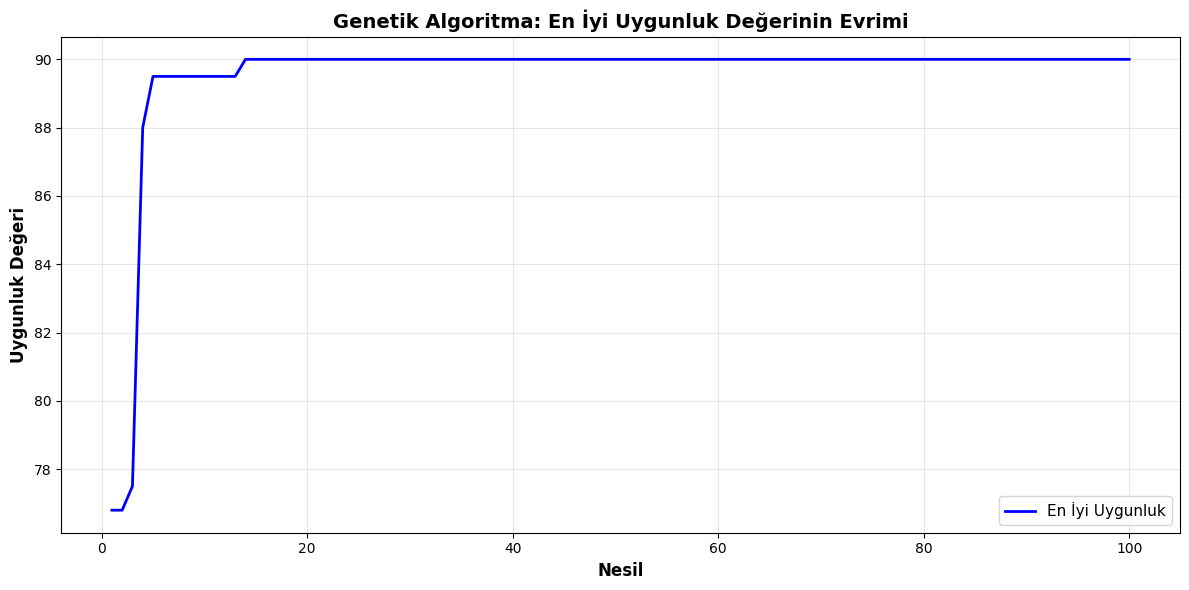

İlk nesil en iyi uygunluk: 76.80
Son nesil en iyi uygunluk: 90.00
İyileşme: 13.20


In [11]:
# Görselleştirme
plt.figure(figsize=(12, 6))
plt.plot(range(1, Gen + 1), fitness_history, 'b-', linewidth=2, label='En İyi Uygunluk')
plt.xlabel('Nesil', fontsize=12, fontweight='bold')
plt.ylabel('Uygunluk Değeri', fontsize=12, fontweight='bold')
plt.title('Genetik Algoritma: En İyi Uygunluk Değerinin Evrimi', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

print(f"İlk nesil en iyi uygunluk: {fitness_history[0]:.2f}")
print(f"Son nesil en iyi uygunluk: {fitness_history[-1]:.2f}")
print(f"İyileşme: {fitness_history[-1] - fitness_history[0]:.2f}")


## 13. Sonuçların Analizi ve Yorumu


In [12]:
# En iyi çözümü analiz et
x1_opt = int(best_solution[0])
x2_opt = int(best_solution[1])
y_opt = objective_function(x1_opt, x2_opt)
fitness_opt = fitness_function(x1_opt, x2_opt, M)

# Kısıt kontrolü
constraint1_value = x1_opt + 0.1 * x2_opt
constraint2_value = x2_opt
constraint1_satisfied = constraint1_value <= 60
constraint2_satisfied = constraint2_value >= 20

print("="*60)
print("OPTİMUM ÇÖZÜM SONUÇLARI")
print("="*60)
print(f"\n📊 En İyi Çözüm:")
print(f"   • Gübre Miktarı (x₁): {x1_opt} kg/da")
print(f"   • Sulama Miktarı (x₂): {x2_opt} L/da")
print(f"   • Maksimum Verim (y): {y_opt:.2f}")
print(f"   • Uygunluk Değeri: {fitness_opt:.2f}")

print(f"\n🔍 Kısıt Kontrolü:")
print(f"   • Kısıt 1 (x₁ + 0.1x₂ ≤ 60): {constraint1_value:.2f} ≤ 60")
print(f"     {'✅ SAĞLANIYOR' if constraint1_satisfied else '❌ İHLAL EDİLİYOR'}")
print(f"   • Kısıt 2 (x₂ ≥ 20): {constraint2_value} ≥ 20")
print(f"     {'✅ SAĞLANIYOR' if constraint2_satisfied else '❌ İHLAL EDİLİYOR'}")

if constraint1_satisfied and constraint2_satisfied:
    print(f"\n✅ TÜM KISITLAR SAĞLANIYOR!")
else:
    print(f"\n⚠️  BAZI KISITLAR İHLAL EDİLİYOR!")

print("\n" + "="*60)


OPTİMUM ÇÖZÜM SONUÇLARI

📊 En İyi Çözüm:
   • Gübre Miktarı (x₁): 10 kg/da
   • Sulama Miktarı (x₂): 20 L/da
   • Maksimum Verim (y): 90.00
   • Uygunluk Değeri: 90.00

🔍 Kısıt Kontrolü:
   • Kısıt 1 (x₁ + 0.1x₂ ≤ 60): 12.00 ≤ 60
     ✅ SAĞLANIYOR
   • Kısıt 2 (x₂ ≥ 20): 20 ≥ 20
     ✅ SAĞLANIYOR

✅ TÜM KISITLAR SAĞLANIYOR!



## 14. Senaryo Bağlamında Yorum

**Optimum Gübre ve Sulama Miktarı Yorumu:**

Genetik Algoritma ile bulunan optimum çözüm, tarım arazisinde maksimum verim elde etmek için gerekli gübre ve sulama miktarlarını belirler.

- **Gübre Miktarı (x₁):** Bulunan optimum değer, toprak verimliliğini artırmak için gerekli besin maddelerini sağlar. Ancak aşırı gübre kullanımı hem maliyeti artırır hem de çevresel etkilere neden olabilir.

- **Sulama Miktarı (x₂):** Optimum sulama miktarı, bitkinin su ihtiyacını karşılayarak büyümesini destekler. Yetersiz sulama verimi düşürürken, aşırı sulama ise su israfına ve toprak erozyonuna yol açabilir.

- **Kısıtlar:**
  - Toplam kaynak kısıtı (x₁ + 0.1x₂ ≤ 60), gübre ve sulamanın birlikte kullanımını sınırlandırarak maliyet kontrolü sağlar.
  - Minimum sulama kısıtı (x₂ ≥ 20), bitkinin temel su ihtiyacının karşılanmasını garanti eder.

Bu optimizasyon sonucunda, çiftçiler kaynaklarını en verimli şekilde kullanarak maksimum mahsul verimi elde edebilirler.
